In [7]:
import pandas as pd

file_path = '/content/PubMed Multi Label Text Classification Dataset Processed.csv'
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')

print("Dataset loaded successfully. Displaying the first 5 rows:")
df.head()

Dataset loaded successfully. Displaying the first 5 rows:


,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...",0,1,1,1,1,0,0,1,0,0,0,0,0,0
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",0,1,1,1,1,1,1,0,1,1,0,1,1,1
2,[Identification of a functionally important di...,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",19060934,"[['G02.111.570.060', 'L01.453.245.667.060'], [...","['Phenomena and Processes [G]', 'Information S...",1,1,0,1,1,0,1,0,0,0,1,0,0,0
3,Multilayer capsules: a promising microencapsul...,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",11426874,"[['D05.750.716.822.111', 'D25.720.716.822.111'...","['Chemicals and Drugs [D]', 'Technology, Indus...",1,1,1,1,1,0,1,0,0,1,0,0,0,0
4,"Nanohydrogel with N,N'-bis(acryloyl)cystine cr...",Substantially improved hydrogel particles base...,"['Antineoplastic Agents', 'Cell Proliferation'...",28323099,"[['D27.505.954.248'], ['G04.161.750', 'G07.345...","['Chemicals and Drugs [D]', 'Phenomena and Pro...",1,1,0,1,1,0,1,0,0,1,0,0,0,0


## Preprocess Text and Labels

### Subtask:
Clean and preprocess the text data and prepare the labels for multi-label classification, ensuring they are in a format suitable for PyTorch.


In [8]:
df['combined_text'] = df['Title'].fillna('') + ' ' + df['abstractText'].fillna('')

print("Combined 'Title' and 'abstractText' into 'combined_text'. Displaying the first 5 rows with the new column:")
print(df[['Title', 'abstractText', 'combined_text']].head())

Combined 'Title' and 'abstractText' into 'combined_text'. Displaying the first 5 rows with the new column:
                                               Title  \
0  Expression of p53 and coexistence of HPV in pr...   
1  Vitamin D status in pregnant Indian women acro...   
2  [Identification of a functionally important di...   
3  Multilayer capsules: a promising microencapsul...   
4  Nanohydrogel with N,N'-bis(acryloyl)cystine cr...   

                                        abstractText  \
0  Fifty-four paraffin embedded tissue sections f...   
1  The present cross-sectional study was conducte...   
2  The occurrence of individual amino acids and d...   
3  In 1980, Lim and Sun introduced a microcapsule...   
4  Substantially improved hydrogel particles base...   

                                       combined_text  
0  Expression of p53 and coexistence of HPV in pr...  
1  Vitamin D status in pregnant Indian women acro...  
2  [Identification of a functionally important di...  

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("NLTK stopwords and WordNet downloaded successfully.")

NLTK stopwords and WordNet downloaded successfully.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['combined_text'].apply(preprocess_text)

print("Text preprocessing applied to 'combined_text' and stored in 'processed_text'. Displaying the first 5 rows of 'processed_text':")
print(df['processed_text'].head())

Text preprocessing applied to 'combined_text' and stored in 'processed_text'. Displaying the first 5 rows of 'processed_text':
0    expression p coexistence hpv premalignant lesi...
1    vitamin status pregnant indian woman across tr...
2    identification functionally important dipeptid...
3    multilayer capsule promising microencapsulatio...
4    nanohydrogel nnbisacryloylcystine crosslinker ...
Name: processed_text, dtype: object


In [11]:
label_columns = [col for col in df.columns if len(col) == 1 and 'A' <= col <= 'Z']

print("Identified label columns:")
print(label_columns)

Identified label columns:
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z']


In [12]:
labels = df[label_columns].values

print("Extracted labels for multi-label classification. Displaying the first 5 rows of labels:")
print(labels[:5])
print(f"Shape of labels: {labels.shape}")

Extracted labels for multi-label classification. Displaying the first 5 rows of labels:
[[0 1 1 1 1 0 0 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 0 1 1 0 1 1 1]
 [1 1 0 1 1 0 1 0 0 0 1 0 0 0]
 [1 1 1 1 1 0 1 0 0 1 0 0 0 0]
 [1 1 0 1 1 0 1 0 0 1 0 0 0 0]]
Shape of labels: (6623, 14)


In [14]:
!pip install gensim

print("gensim installed successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 74.9 MB/s eta 0:00:00
gensim installed successfully.


In [15]:
from gensim.models import Word2Vec

# Prepare text data for Word2Vec (list of lists of words)
sentences = df['processed_text'].apply(lambda x: x.split()).tolist()

print("Prepared text data for Word2Vec. Displaying the first 2 sentences:")
print(sentences[:2])

Prepared text data for Word2Vec. Displaying the first 2 sentences:
[['expression', 'p', 'coexistence', 'hpv', 'premalignant', 'lesion', 'cervical', 'cancer', 'fiftyfour', 'paraffin', 'embedded', 'tissue', 'section', 'patient', 'dysplasia', 'case', 'cervical', 'cancer', 'case', 'analysed', 'hpv', 'detected', 'identified', 'two', 'stage', 'firstly', 'using', 'mixed', 'starter', 'chosen', 'genomic', 'dna', 'sequence', 'amplified', 'secondly', 'material', 'thus', 'obtained', 'analyzed', 'hybridization', 'method', 'using', 'oligonucleotyde', 'p', 'labelled', 'probe', 'hpvs', 'type', 'identified', 'p', 'expression', 'assayed', 'immunohistochemical', 'method', 'hpv', 'infection', 'often', 'associated', 'dysplasia', 'cervical', 'cancer', 'cervical', 'cancer', 'mainly', 'hpv', 'high', 'oncogenic', 'potential', 'found', 'p', 'present', 'rarely', 'minute', 'quantity', 'correlation', 'observed', 'presence', 'p', 'hpvs', 'dna'], ['vitamin', 'status', 'pregnant', 'indian', 'woman', 'across', 'trimes

In [16]:
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

print("Word2Vec model trained successfully.")
print(f"Vocabulary size: {len(word2vec_model.wv)}")

Word2Vec model trained successfully.
Vocabulary size: 55848


In [17]:
import numpy as np

def get_document_embedding(sentence, model, vector_size):
    embeddings = []
    for word in sentence:
        if word in model.wv:
            embeddings.append(model.wv[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(vector_size) # Return a zero vector if no words are found in vocabulary

# Apply the function to create document embeddings
df['word2vec_embeddings'] = df['processed_text'].apply(lambda x: get_document_embedding(x.split(), word2vec_model, 100))

print("Word2Vec document embeddings generated successfully.")
print(f"Shape of Word2Vec embeddings: {np.array(df['word2vec_embeddings'].tolist()).shape}")
print("First 5 Word2Vec embeddings:")
print(df['word2vec_embeddings'].head())

Word2Vec document embeddings generated successfully.
Shape of Word2Vec embeddings: (6623, 100)
First 5 Word2Vec embeddings:
0    [0.037470557, 0.8604862, 0.03288442, -0.184872...
1    [-0.11621254, 0.6331864, 0.24398059, -0.050159...
2    [-0.23839642, 0.32743785, 0.2536173, -0.410093...
3    [-0.17839654, 0.30365327, 0.1869137, -0.191455...
4    [-0.18861707, 0.30863342, 0.21326251, -0.24099...
Name: word2vec_embeddings, dtype: object


In [18]:
import requests
import zipfile
import os

glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "glove.6B.zip"
glove_dir = "glove.6B"

# Download GloVe if not already downloaded
if not os.path.exists(glove_zip_path):
    print(f"Downloading GloVe model from {glove_url}...")
    r = requests.get(glove_url, allow_redirects=True)
    with open(glove_zip_path, 'wb') as f:
        f.write(r.content)
    print("Download complete.")
else:
    print("GloVe zip file already exists.")

# Extract GloVe if not already extracted
if not os.path.exists(glove_dir):
    print(f"Extracting {glove_zip_path}...")
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(glove_dir)
    print("Extraction complete.")
else:
    print("GloVe directory already exists.")

print("GloVe pre-trained vectors ready for loading.")

Download complete.
Extracting glove.6B.zip...
Extraction complete.
GloVe pre-trained vectors ready for loading.


In [19]:
glove_embedding_dim = 100 # Using 100-dimensional GloVe vectors (glove.6B.100d.txt)
glove_model_path = os.path.join(glove_dir, f'glove.6B.{glove_embedding_dim}d.txt')

glove_embeddings = {}
with open(glove_model_path, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=np.float32)
        glove_embeddings[word] = vector

print(f"Loaded {len(glove_embeddings)} GloVe word vectors.")
print(f"Example GloVe embedding for 'the': {glove_embeddings.get('the')[:5]}...")

Loaded 400000 GloVe word vectors.
Example GloVe embedding for 'the': [-0.038194 -0.24487   0.72812  -0.39961   0.083172]...


In [20]:
def get_glove_document_embedding(sentence, glove_model, vector_size):
    embeddings = []
    for word in sentence:
        if word in glove_model:
            embeddings.append(glove_model[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(vector_size) # Return a zero vector if no words are found in vocabulary

# Apply the function to create document embeddings
df['glove_embeddings'] = df['processed_text'].apply(lambda x: get_glove_document_embedding(x.split(), glove_embeddings, glove_embedding_dim))

print("GloVe document embeddings generated successfully.")
print(f"Shape of GloVe embeddings: {np.array(df['glove_embeddings'].tolist()).shape}")
print("First 5 GloVe embeddings:")
print(df['glove_embeddings'].head())

GloVe document embeddings generated successfully.
Shape of GloVe embeddings: (6623, 100)
First 5 GloVe embeddings:
0    [-0.15188786, 0.37608194, -0.010097153, 0.2001...
1    [-0.021581853, 0.24450754, 0.04011786, 0.19154...
2    [-0.075351454, 0.18336718, -0.042877372, 0.205...
3    [-0.2890212, 0.13772815, 0.050087836, 0.191180...
4    [-0.06717669, 0.14728689, 0.024514372, 0.08332...
Name: glove_embeddings, dtype: object


In [21]:
import requests
import zipfile
import os

fasttext_url = "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip"
fasttext_zip_path = "wiki-news-300d-1M.vec.zip"
fasttext_vec_path = "wiki-news-300d-1M.vec"

# Download FastText if not already downloaded
if not os.path.exists(fasttext_vec_path):
    if not os.path.exists(fasttext_zip_path):
        print(f"Downloading FastText model from {fasttext_url}...")
        r = requests.get(fasttext_url, allow_redirects=True)
        with open(fasttext_zip_path, 'wb') as f:
            f.write(r.content)
        print("Download complete.")
    else:
        print("FastText zip file already exists.")

    # Extract FastText if not already extracted
    print(f"Extracting {fasttext_zip_path}...")
    with zipfile.ZipFile(fasttext_zip_path, 'r') as zip_ref:
        zip_ref.extractall('.')
    print("Extraction complete.")
else:
    print("FastText vector file already exists.")

print("FastText pre-trained vectors ready for loading.")

Download complete.
Extracting wiki-news-300d-1M.vec.zip...
Extraction complete.
FastText pre-trained vectors ready for loading.


In [22]:
from gensim.models import KeyedVectors

print(f"Loading FastText model from {fasttext_vec_path}. This may take a few minutes...")
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_vec_path, binary=False)

print("FastText model loaded successfully.")
print(f"Vocabulary size: {len(fasttext_model.key_to_index)}")
print(f"Embedding dimension: {fasttext_model.vector_size}")

Loading FastText model from wiki-news-300d-1M.vec. This may take a few minutes...
FastText model loaded successfully.
Vocabulary size: 999994
Embedding dimension: 300


In [23]:
def get_fasttext_document_embedding(sentence, fasttext_model, vector_size):
    embeddings = []
    for word in sentence:
        if word in fasttext_model:
            embeddings.append(fasttext_model[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(vector_size) # Return a zero vector if no words are found in vocabulary

# Apply the function to create document embeddings
df['fasttext_embeddings'] = df['processed_text'].apply(lambda x: get_fasttext_document_embedding(x.split(), fasttext_model, fasttext_model.vector_size))

print("FastText document embeddings generated successfully.")
print(f"Shape of FastText embeddings: {np.array(df['fasttext_embeddings'].tolist()).shape}")
print("First 5 FastText embeddings:")
print(df['fasttext_embeddings'].head())

FastText document embeddings generated successfully.
Shape of FastText embeddings: (6623, 300)
First 5 FastText embeddings:
0    [-0.008698682, -0.03336185, -0.019271052, 0.03...
1    [-0.0036489235, -0.012044607, 0.02368992, 0.04...
2    [-0.050136372, 0.0043818187, 0.011596968, 0.04...
3    [-0.018281385, -0.00041655128, -0.012951728, 0...
4    [-0.034595676, -0.024705037, 0.008357556, 0.00...
Name: fasttext_embeddings, dtype: object


In [24]:
!pip install transformers torch

In [25]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval() # Set model to evaluation mode

print("BERT tokenizer and model loaded successfully.")
print(f"Model device: {device}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT tokenizer and model loaded successfully.
Model device: cpu


In [26]:
def get_bert_embeddings(texts, tokenizer, model, device, max_length=128, batch_size=16):
    model.eval() # Ensure model is in evaluation mode
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        encoded_input = tokenizer(batch_texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')
        input_ids = encoded_input['input_ids'].to(device)
        attention_mask = encoded_input['attention_mask'].to(device)

        with torch.no_grad():
            model_output = model(input_ids=input_ids, attention_mask=attention_mask)

        # Use the mean of the last hidden state as the document embedding
        # We can also use the [CLS] token embedding (model_output.last_hidden_state[:, 0, :])
        batch_embeddings = model_output.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.extend(batch_embeddings)
    return embeddings

# Generate BERT embeddings
bert_embeddings = get_bert_embeddings(df['processed_text'].tolist(), tokenizer, model, device)
df['bert_embeddings'] = bert_embeddings

print("BERT embeddings generated successfully.")
print(f"Shape of BERT embeddings: {np.array(df['bert_embeddings'].tolist()).shape}")
print("First 5 BERT embeddings:")
print(df['bert_embeddings'].head())

BERT embeddings generated successfully.
Shape of BERT embeddings: (6623, 768)
First 5 BERT embeddings:
0    [-0.23044893, 0.19176933, 0.36238045, -0.04939...
1    [-0.19282016, 0.048353165, 0.1651985, -0.14789...
2    [-0.52112734, 0.2563145, 0.18985236, -0.072621...
3    [-0.1259628, 0.3171582, 0.56528884, -0.0601881...
4    [-0.39458987, 0.28268752, 0.3873474, -0.056446...
Name: bert_embeddings, dtype: object


In [27]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np

embedding_cols = ['word2vec_embeddings', 'glove_embeddings', 'fasttext_embeddings', 'bert_embeddings']
dataloaders = {}

for col_name in embedding_cols:
    print(f"Processing {col_name}...")
    # Convert embeddings to PyTorch tensors
    embeddings_np = np.array(df[col_name].tolist())
    embeddings_tensor = torch.tensor(embeddings_np, dtype=torch.float32)

    # Convert labels to PyTorch tensors
    labels_tensor = torch.tensor(labels, dtype=torch.float32)

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(embeddings_tensor,
                                                      labels_tensor,
                                                      test_size=0.2,
                                                      random_state=42)

    # Create TensorDatasets
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)

    # Create DataLoaders
    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Store DataLoaders
    embedding_type = col_name.replace('_embeddings', '')
    dataloaders[f'{embedding_type}_train'] = train_loader
    dataloaders[f'{embedding_type}_val'] = val_loader

print("Data preparation for PyTorch complete.")
print("Keys in dataloaders dictionary:", dataloaders.keys())


Processing word2vec_embeddings...
Processing glove_embeddings...
Processing fasttext_embeddings...
Processing bert_embeddings...
Data preparation for PyTorch complete.
Keys in dataloaders dictionary: dict_keys(['word2vec_train', 'word2vec_val', 'glove_train', 'glove_val', 'fasttext_train', 'fasttext_val', 'bert_train', 'bert_val'])


In [28]:
import torch.nn as nn

class MultiLabelClassifier(nn.Module):
    def __init__(self, input_dim, num_labels):
        super(MultiLabelClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256) # Input layer to a hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_labels) # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid() # Sigmoid for multi-label classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

print("MultiLabelClassifier model class defined successfully.")

MultiLabelClassifier model class defined successfully.


In [29]:
import torch.optim as optim
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

results = {}
num_epochs = 10 # Define the number of epochs for training

for embedding_type in ['word2vec', 'glove', 'fasttext', 'bert']:
    print(f"\n--- Training and Evaluating Model for {embedding_type.upper()} ---")

    train_loader = dataloaders[f'{embedding_type}_train']
    val_loader = dataloaders[f'{embedding_type}_val']

    # Determine input_dim and num_labels dynamically
    input_dim = train_loader.dataset.tensors[0].shape[1]
    num_labels = train_loader.dataset.tensors[1].shape[1]

    model = MultiLabelClassifier(input_dim, num_labels).to(device)
    criterion = nn.BCELoss() # Using BCELoss because Sigmoid is applied in the model's forward pass
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training Loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch_embeddings, batch_labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training ({embedding_type})"):
            batch_embeddings, batch_labels = batch_embeddings.to(device), batch_labels.to(device)

            optimizer.zero_grad()
            outputs = model(batch_embeddings)
            loss = criterion(outputs, batch_labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Training Loss: {total_loss/len(train_loader):.4f}")

    # Evaluation Loop
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch_embeddings, batch_labels in tqdm(val_loader, desc=f"Evaluation ({embedding_type})"):
            batch_embeddings, batch_labels = batch_embeddings.to(device), batch_labels.to(device)
            outputs = model(batch_embeddings)

            all_labels.extend(batch_labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    binary_preds = (all_preds > 0.5).astype(int)

    # Calculate metrics
    macro_f1 = f1_score(all_labels, binary_preds, average='macro')
    macro_precision = precision_score(all_labels, binary_preds, average='macro', zero_division=0)
    macro_recall = recall_score(all_labels, binary_preds, average='macro', zero_division=0)
    try:
        valid_labels_for_roc = np.where(all_labels.sum(axis=0) > 0)[0]
        if valid_labels_for_roc.size > 0:
            # Filter out columns with only one class for ROC AUC calculation
            roc_auc = roc_auc_score(all_labels[:, valid_labels_for_roc], all_preds[:, valid_labels_for_roc], average='macro', multi_class='ovr')
        else:
            roc_auc = 0.0 # No valid labels for ROC AUC
    except ValueError:
        roc_auc = 0.0 # Fallback for other potential issues


    results[embedding_type] = {
        'f1_score': macro_f1,
        'precision_score': macro_precision,
        'recall_score': macro_recall,
        'roc_auc_score': roc_auc
    }

print("\n--- All Models Training and Evaluation Complete ---")
print("Results:", results)


--- Training and Evaluating Model for WORD2VEC ---


Epoch 1/10 Training (word2vec):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 1, Training Loss: 0.4377


Epoch 2/10 Training (word2vec):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 2, Training Loss: 0.3887


Epoch 3/10 Training (word2vec):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 3, Training Loss: 0.3797


Epoch 4/10 Training (word2vec):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 4, Training Loss: 0.3750


Epoch 5/10 Training (word2vec):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 5, Training Loss: 0.3719


Epoch 6/10 Training (word2vec):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 6, Training Loss: 0.3695


Epoch 7/10 Training (word2vec):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 7, Training Loss: 0.3675


Epoch 8/10 Training (word2vec):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 8, Training Loss: 0.3651


Epoch 9/10 Training (word2vec):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 9, Training Loss: 0.3627


Epoch 10/10 Training (word2vec):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 10, Training Loss: 0.3613


Evaluation (word2vec):   0%|          | 0/42 [00:00<?, ?it/s]


--- Training and Evaluating Model for GLOVE ---


Epoch 1/10 Training (glove):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 1, Training Loss: 0.4496


Epoch 2/10 Training (glove):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 2, Training Loss: 0.3721


Epoch 3/10 Training (glove):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 3, Training Loss: 0.3542


Epoch 4/10 Training (glove):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 4, Training Loss: 0.3458


Epoch 5/10 Training (glove):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 5, Training Loss: 0.3399


Epoch 6/10 Training (glove):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 6, Training Loss: 0.3363


Epoch 7/10 Training (glove):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 7, Training Loss: 0.3332


Epoch 8/10 Training (glove):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 8, Training Loss: 0.3311


Epoch 9/10 Training (glove):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 9, Training Loss: 0.3284


Epoch 10/10 Training (glove):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 10, Training Loss: 0.3266


Evaluation (glove):   0%|          | 0/42 [00:00<?, ?it/s]


--- Training and Evaluating Model for FASTTEXT ---


Epoch 1/10 Training (fasttext):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 1, Training Loss: 0.4849


Epoch 2/10 Training (fasttext):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 2, Training Loss: 0.3902


Epoch 3/10 Training (fasttext):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 3, Training Loss: 0.3676


Epoch 4/10 Training (fasttext):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 4, Training Loss: 0.3517


Epoch 5/10 Training (fasttext):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 5, Training Loss: 0.3405


Epoch 6/10 Training (fasttext):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 6, Training Loss: 0.3329


Epoch 7/10 Training (fasttext):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 7, Training Loss: 0.3283


Epoch 8/10 Training (fasttext):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 8, Training Loss: 0.3247


Epoch 9/10 Training (fasttext):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 9, Training Loss: 0.3217


Epoch 10/10 Training (fasttext):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 10, Training Loss: 0.3188


Evaluation (fasttext):   0%|          | 0/42 [00:00<?, ?it/s]


--- Training and Evaluating Model for BERT ---


Epoch 1/10 Training (bert):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 1, Training Loss: 0.4086


Epoch 2/10 Training (bert):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 2, Training Loss: 0.3421


Epoch 3/10 Training (bert):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 3, Training Loss: 0.3291


Epoch 4/10 Training (bert):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 4, Training Loss: 0.3211


Epoch 5/10 Training (bert):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 5, Training Loss: 0.3154


Epoch 6/10 Training (bert):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 6, Training Loss: 0.3113


Epoch 7/10 Training (bert):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 7, Training Loss: 0.3073


Epoch 8/10 Training (bert):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 8, Training Loss: 0.3035


Epoch 9/10 Training (bert):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 9, Training Loss: 0.3001


Epoch 10/10 Training (bert):   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 10, Training Loss: 0.2970


Evaluation (bert):   0%|          | 0/42 [00:00<?, ?it/s]


--- All Models Training and Evaluation Complete ---
Results: {'word2vec': {'f1_score': 0.6100163597145617, 'precision_score': 0.6890196866347719, 'recall_score': 0.5987269122981476, 'roc_auc_score': np.float64(0.8406699352762051)}, 'glove': {'f1_score': 0.6580275688917102, 'precision_score': 0.7670428525001725, 'recall_score': 0.620512564018138, 'roc_auc_score': np.float64(0.8615443193015011)}, 'fasttext': {'f1_score': 0.6706382401170667, 'precision_score': 0.7536417853913356, 'recall_score': 0.6446490411900893, 'roc_auc_score': np.float64(0.8697078749240644)}, 'bert': {'f1_score': 0.7003897949543126, 'precision_score': 0.760171664952272, 'recall_score': 0.6882217377197936, 'roc_auc_score': np.float64(0.8738024882186463)}}


<Figure size 1200x700 with 0 Axes>

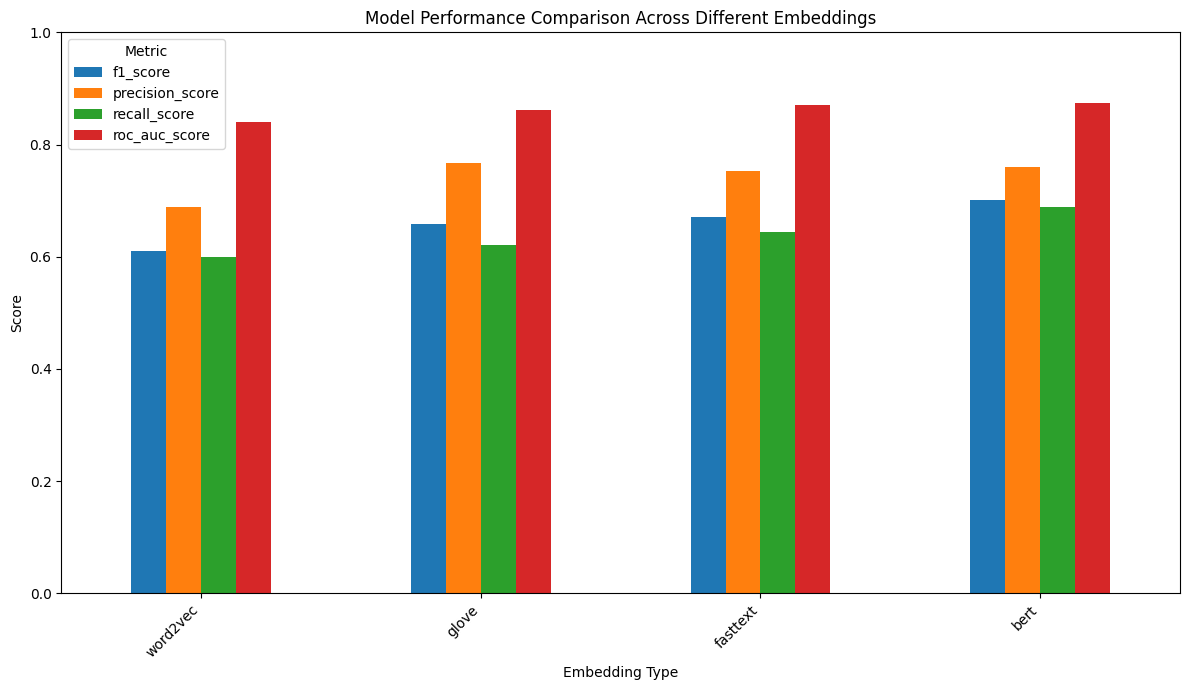

Comparison chart displayed.


In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert results dictionary to a DataFrame for easier plotting
results_df = pd.DataFrame(results).T # Transpose to have embedding types as index

# Plotting the metrics
metrics = ['f1_score', 'precision_score', 'recall_score', 'roc_auc_score']

plt.figure(figsize=(12, 7))
results_df[metrics].plot(kind='bar', figsize=(12, 7))
plt.title('Model Performance Comparison Across Different Embeddings')
plt.xlabel('Embedding Type')
plt.ylabel('Score')
plt.ylim(0, 1) # Metrics are typically between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

print("Comparison chart displayed.")